## Statistical Analysis

We have learned null hypothesis, and compared two-sample test to check whether two samples are the same or not

To add more to statistical analysis, the follwoing topics should be covered:

1- Approxite the histogram of data with combination of Gaussian (Normal) distribution functions:

    Gaussian Mixture Model (GMM)
    Kernel Density Estimation (KDE)
    
2- Correlation among features


## Review

Write a function that computes and plot histogram of a given data

Histogram is one method for estimating density

## What is Gaussian Mixture Model (GMM)?

GMM is a probabilistic model for representing normally distributed subpopulations within an overall population

<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/05/Gaussian-mixture-example.svg_.png" width="300">

$p(x) = \sum_{i = 1}^{K} w_i \ \mathcal{N}(x \ | \ \mu_i,\ \sigma_i)$

$\sum_{i=1}^{K} w_i = 1$

https://brilliant.org/wiki/gaussian-mixture-model/


In the image above, we see 3 peaks which means there are 3 normal distributions

## Activity : Fit a GMM to a given data sample 

Task: 

1- Generate the concatination of the random variables as follows:

`x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))`

2- Plot the histogram of `x`

3- Obtain the weights, mean and variances of each Gassuian

Steps needed: 
`from sklearn import mixture 
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))`

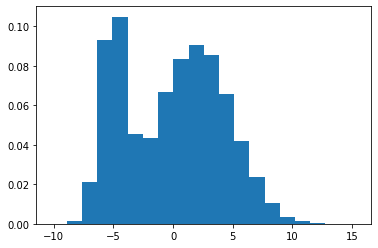

Gmm means:[[ 2.08318264]
 [-4.96870937]]
Gmm covariances:[[[8.62769483]]

 [[1.10041126]]]
Gmm weights:[0.69047421 0.30952579]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
import pandas as pd

x_1 = np.random.normal(-5, 1, 3000) # mean = -5, STD = 1 so variance = std^2 = 1
x_2 = np.random.normal(2, 3, 7000) # mean = 2, STD = 3 so variance = std^2 = 9
x = np.concatenate((x_1, x_2)) # list x is a concatenation of x_1 and x_2

plt.hist(x, bins=20, density=1) # density = 1 means we are plotting the PDF
plt.show()

# print(np.mean(x_1)) # -5
# print(np.mean(x_2)) # 2
# print(np.var(x_1)) # 1
# print(np.var(x_2)) # 9

# What percentage of data in x is x_1 and x_2?
# percentage_of_x_1 = (len(x_1)/len(x)) * 100
# print(percentage_of_x_1) # 30

# percentage_of_x_2 = (len(x_2)/len(x)) * 100
# print(percentage_of_x_2) # 70

# Define a GMM model and obtain its parameters
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print('Gmm means:' + str(gmm.means_))
print('Gmm covariances:' + str(gmm.covariances_))
print('Gmm weights:' + str(gmm.weights_))


## The GMM has learn the probability density function of our data sample

Lets the model generate sample from it model:

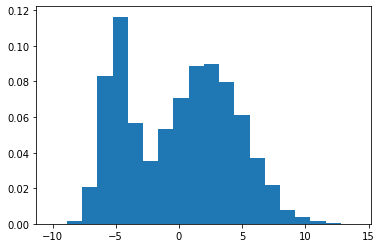

In [25]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

# Question are the samples in  x and z the same?
- No.

## Kernel Density Estimation (KDE)

Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. In other words the aim of KDE is to find probability density function (PDF) for a given dataset.

Approximate the pdf of dataset:

$p(x) = \frac{1}{Nh}\sum_{i = 1}^{N} \ K(\frac{x - x_i}{h})$

where $h$ is a bandwidth and $N$ is the number of data points

## Activity: Apply KDE on a given data sample

Task: Apply KDE on previous generated sample data `x`

Hint: use 

`kde = KernelDensity(kernel='gaussian', bandwidth=0.6)`

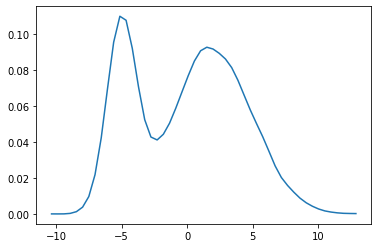

In [36]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6) # 'gaussian' or 'normal' are the same thing
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1, 1))
plt.plot(s, np.exp(log_pdf))

# the 2 peaks are the means of x_1 and x_2

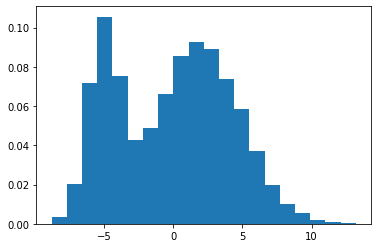

In [37]:
m = kde.sample(10000)
plt.hist(m, bins=20, density=1)
plt.show()

## Correlation 

Correlation is used to test relationships between quantitative variables

Some examples of data that have a high correlation:

1- Your caloric intake and your weight

2- The amount of time your study and your GPA

Question what is negative correlation?

1- The number of resources and computational time (more resources = less time)

Correlations are useful because we can find out what relationship variables have, we can make predictions about future behavior. 

## Activity: Obtain the correlation among all features of iris dataset

1- Review the iris dataset. What are the features? 

2- Eliminate two columns `['Id', 'Species']`

3- Compute the correlation among all features. 

Hint: Use `df.corr()`

4- Plot the correlation by heatmap and corr plot in Seaborn -> `sns.heatmap`, `sns.corrplot`

5- Write a function that computes the correlation (Pearson formula)

Hint: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

6- Compare your answer with `scipy.stats.pearsonr` for any given two features


If there are 4 features, how many pair possibilities are there?
> - n choose K
> - K for this example is 2 because we are choosing pairs, if we were choosing triples then K would be 3
> - (n/K) = (n!/K!(n-K))
> - (4!/2!(4-2)) = 6

In [15]:
from scipy.special import comb
comb(4,2) # 4 features, how many pairs are there?

6.0

In [16]:
comb(10,2) # 10 features, how many pairs are there?

45.0

In [45]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import scipy.stats

df = pd.read_csv('iris.csv')

def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

print(pearson_corr(df['SepalLengthCm'], df['PetalLengthCm'])) # 0.87175
print(scipy.stats.pearsonr(df['SepalLengthCm'], df['PetalLengthCm']))

0.8717541573048714
(0.8717541573048713, 1.0384540627941062e-47)


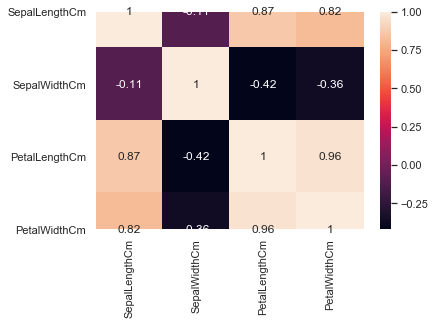

In [46]:
# The Heat map is a correlation between pairs of 4 features: Sepal Length, Sepal Width, Petal Length, Petal Width

df = pd.read_csv('iris.csv')
df = df.drop(columns=['Id', 'Species'])
# plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)


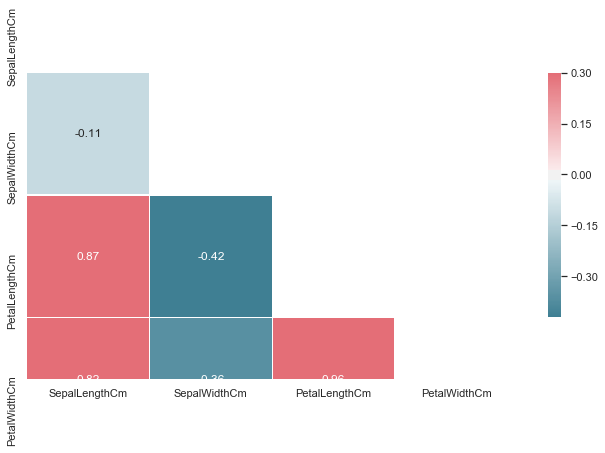

In [63]:
df = pd.read_csv('iris.csv')
df = df.drop(columns=['Id', 'Species'])
# plt.figure(figsize=(8, 6))
# sns.heatmap(df.corr(), annot=True)


sns.set(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)